In [148]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [4]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [53]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [45]:
x = cancer.data[:, 22]
y = cancer.target

In [46]:
w = 1
b = 1

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x.reshape(-1,1))
x = x_scaled.flatten()

In [41]:
import numpy as np

In [50]:
w = 1
b = 1
for i in range(100):
    for x_i, y_i in zip(x, y):
        z = x_i * w + b
        # 분류 > 활성화함수(시그모이드)
        a = 1 / (1 + np.exp(-z))
        err = y_i - a
        w_rate = x_i
        b_rate = 1
        w = w + w_rate * err
        b = b + b_rate * err
print(w, b)

-6.753469411495247 1.5315343991725152


In [30]:
x.min(), x.max()

(-1.6933610341815326, 4.287337462505881)

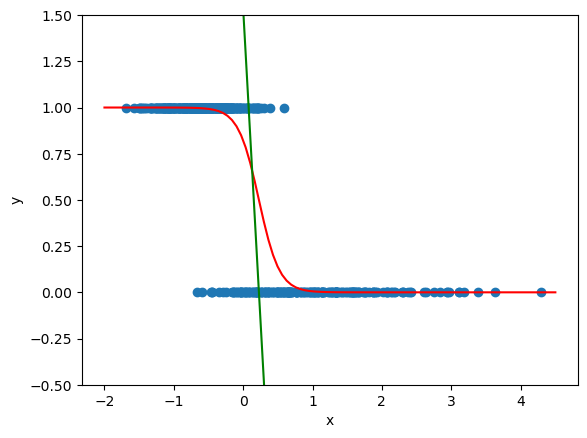

In [52]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
xx = np.linspace(-2, 4.5, 100)
z = w * xx + b
a = 1 / (1 + np.exp(-z))
plt.plot(xx, a, color='red')
plt.xlabel('x'); plt.ylabel('y')
plt.ylim(-0.5, 1.5)


pt1 = (-2, -2 * w + b)
pt2 = (4.5, 4.5 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], color='green')

plt.show()

In [67]:
# 22, 27번 데이터
x = cancer.data[:, [22, 27]]
y = cancer.target

In [59]:
# 입력데이터 2개, 출력데이터 1개, 은닉층 0개
# N(2) * M(1) = 가중치의 개수 = 2
# M(1) = 절편의 개수 = 1
w1 = 1
w2 = 1
b = 1
# 데이터
x1 = x[0, 0]
x2 = x[0, 1]

# 가중합산
z = x1 * w1 + x2 * w2 + b
a = 1 / (1 + np.exp(-z))

# 오차역전파
w1 = w1 + (y[0] - a) * x1
w2 = w2 + (y[0] - a) * x2
b = b + (y[0] - a)

print(w1, w2, b)

-183.6 0.7345999999999999 0.0


In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [69]:
w1 = 1
w2 = 1
b = 1
for x_i, y_i in zip(x, y):
    x1 = x_i[0]
    x2 = x_i[1]
    
    z = x1 * w1 + x2 * w2 + b
    a = 1 / (1 + np.exp(-z))
    err = (y_i - a)
    
    w1 = w1 + err * x1
    w2 = w2 + err * x2
    b = b + err
print(w1, w2, b)

-4.9206485560714315 -3.099375164470749 1.8218072774829444


In [71]:
np.ones(2)

array([1., 1.])

In [74]:
x[0] * np.ones(2)
# [w1x1 , w2x2]

array([2.30360062, 2.29607613])

In [76]:
x_i* err
# [x1 * err , x2 * err]

array([-9.00056391e-07, -1.09626344e-06])

In [77]:
w + x_i* err
# [w1 + x1 * err, w2 + x2 * err]

array([0.9999991, 0.9999989])

In [78]:
w = np.ones(2)
b = 1
for x_i, y_i in zip(x, y):
    
    z = np.sum(x_i * w) + b  # w1x1 + w2x2 + b
    a = 1 / (1 + np.exp(-z))
    err = (y_i - a)
    
    # w1 = w1 + err * x1
    # w2 = w2 + err * x2
    w = w + x_i * err
    b = b + err
print(w, b)

[-4.92064856 -3.09937516] 1.8218072774829444


In [80]:
np.clip(0, 1, 5)

1

In [82]:
1 / (1 + np.exp(200))  >>>> 0으로 수렴

1.3838965267367376e-87

In [83]:
class LogisticNeuron:
    # 기본 가중치 생성
    def __init__(self):
        self.w = None
        self.b = None
    
    # 정방향 계산 함수
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    # 가중치 업데이트
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    # 활성화 함수
    def activation(self, z):
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a
    
    # 훈련을 위한 fit() 메서드 생성
    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            for x_i, y_i in zip(x, y):
                z = self.forpass(x_i)
                a = self.activation(z)
                err = -(y_i - a)
                w_grad, b_grad = self.backprop(x_i, err)
                self.w -= w_grad
                self.b -= b_grad


    # 예측 함수 생성
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        a = self.activation(np.array(z))
        return a > 0.5

In [84]:
# 모델 훈련
neuron = LogisticNeuron()
neuron.fit(X_train, y_train)
print(neuron.w, neuron.b)

[ 4.44021200e+03 -1.92885000e+03  2.31902600e+04  4.82700000e+03
  1.95098500e+01 -1.11436330e+02 -2.07648288e+02 -7.92234290e+01
  2.56121000e+01  1.99302000e+01 -2.43320000e+01 -2.19092700e+02
 -7.60099000e+02 -1.49900060e+04  7.47466000e-01 -3.49603630e+01
 -5.00837511e+01 -8.96486300e+00 -4.73503200e+00 -1.33099400e+00
  4.74971700e+03 -4.81984000e+03  2.12323400e+04 -9.47580000e+03
  6.09926000e+00 -4.27425560e+02 -5.99597289e+02 -1.48915810e+02
 -4.41484000e+01 -7.82273000e+00] 569.0


In [93]:
pred = neuron.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.7982456140350878

In [95]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

pred2 = dt_clf.predict(X_test)
accuracy_score(y_test, pred2)

0.9122807017543859

In [96]:
from sklearn.linear_model import SGDClassifier

SGDClassifier()

SGDClassifier()

In [272]:
class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        # 손실 함수 저장하기 위한 리스트
        self.losses = []
        
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def activation(self, z):
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a
    
    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1])
        self.b = 0 
        for epoch in range(epochs):
            # 손실 초기화
            loss = 0
            # x의 index 랜덤하게 반환
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = -(y[i] - a)
                w_grad, b_grad = self.backprop(x[i], err)
                self.w -= w_grad
                self.b -= b_grad
                # 안전한 로그 계산을 위한 범위 축소
                a = np.clip(a, 1e-10, 1-1e-10) 
                # 손실 계산
                loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1 - a))

            # 에포크마다 평균 손실을 저장
            loss = loss / len(y)
            self.losses.append(loss)
            print(f'##### EPOCHS : {epoch + 1} ######')
            print(f'loss : {loss}')
            
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z) > 0
    
    # 정확도 계산 함수 생성
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [273]:
# 로지스틱 손실 함수

# -(y * np.log(a) + (1 - y) * np.log(1 - a))
-(0 * np.log(0.9999999999) + (1 - 0) * np.log(1 - 0.9999999999))

23.02585084720009

In [274]:
layer = SingleLayer()
layer.fit(X_train_scaled, y_train, epochs=1000)
print(layer.score(X_test_scaled, y_test))

##### EPOCHS : 1 ######
loss : 0.47231141113802083
##### EPOCHS : 2 ######
loss : 0.35234609115652393
##### EPOCHS : 3 ######
loss : 0.23349983598405613
##### EPOCHS : 4 ######
loss : 0.23764864777598146
##### EPOCHS : 5 ######
loss : 0.2739921021405173
##### EPOCHS : 6 ######
loss : 0.2670895348563133
##### EPOCHS : 7 ######
loss : 0.23888463696959694
##### EPOCHS : 8 ######
loss : 0.19327421985443188
##### EPOCHS : 9 ######
loss : 0.19417833171039683
##### EPOCHS : 10 ######
loss : 0.22356797892725794
##### EPOCHS : 11 ######
loss : 0.22295447963637438
##### EPOCHS : 12 ######
loss : 0.19977697143994627
##### EPOCHS : 13 ######
loss : 0.25695927881368086
##### EPOCHS : 14 ######
loss : 0.16049109477403667
##### EPOCHS : 15 ######
loss : 0.17754854225858913
##### EPOCHS : 16 ######
loss : 0.2043023121533524
##### EPOCHS : 17 ######
loss : 0.16852286112535297
##### EPOCHS : 18 ######
loss : 0.2313310739116998
##### EPOCHS : 19 ######
loss : 0.28939138399990727
##### EPOCHS : 20 ######


##### EPOCHS : 160 ######
loss : 0.15020763356012878
##### EPOCHS : 161 ######
loss : 0.11001329660591276
##### EPOCHS : 162 ######
loss : 0.11618586630984266
##### EPOCHS : 163 ######
loss : 0.1183417052660289
##### EPOCHS : 164 ######
loss : 0.10715780790524491
##### EPOCHS : 165 ######
loss : 0.19715934460057224
##### EPOCHS : 166 ######
loss : 0.13525635534530075
##### EPOCHS : 167 ######
loss : 0.12539652279535835
##### EPOCHS : 168 ######
loss : 0.1324692605449627
##### EPOCHS : 169 ######
loss : 0.11922440107415937
##### EPOCHS : 170 ######
loss : 0.13088125662312716
##### EPOCHS : 171 ######
loss : 0.06071735038713268
##### EPOCHS : 172 ######
loss : 0.15011327206978772
##### EPOCHS : 173 ######
loss : 0.18285293938633063
##### EPOCHS : 174 ######
loss : 0.09419859085174004
##### EPOCHS : 175 ######
loss : 0.21404410709267996
##### EPOCHS : 176 ######
loss : 0.11619462195542932
##### EPOCHS : 177 ######
loss : 0.12443713390485252
##### EPOCHS : 178 ######
loss : 0.1520045144541

##### EPOCHS : 316 ######
loss : 0.1228636458467429
##### EPOCHS : 317 ######
loss : 0.08407232847604686
##### EPOCHS : 318 ######
loss : 0.09219402944012324
##### EPOCHS : 319 ######
loss : 0.10352048321270989
##### EPOCHS : 320 ######
loss : 0.11658597725604877
##### EPOCHS : 321 ######
loss : 0.10061985529661335
##### EPOCHS : 322 ######
loss : 0.2209009477560886
##### EPOCHS : 323 ######
loss : 0.17452246091738324
##### EPOCHS : 324 ######
loss : 0.10169517107063053
##### EPOCHS : 325 ######
loss : 0.11724577386252909
##### EPOCHS : 326 ######
loss : 0.14471721224599227
##### EPOCHS : 327 ######
loss : 0.11271301093610073
##### EPOCHS : 328 ######
loss : 0.13268110437208477
##### EPOCHS : 329 ######
loss : 0.06917444121504505
##### EPOCHS : 330 ######
loss : 0.10685686822838468
##### EPOCHS : 331 ######
loss : 0.12165112055007354
##### EPOCHS : 332 ######
loss : 0.14909882608035768
##### EPOCHS : 333 ######
loss : 0.13642986831048148
##### EPOCHS : 334 ######
loss : 0.1058463666867

##### EPOCHS : 472 ######
loss : 0.10806989647383854
##### EPOCHS : 473 ######
loss : 0.08883164996088581
##### EPOCHS : 474 ######
loss : 0.11156758428864982
##### EPOCHS : 475 ######
loss : 0.0651954754996355
##### EPOCHS : 476 ######
loss : 0.09372959943198583
##### EPOCHS : 477 ######
loss : 0.17387425139653753
##### EPOCHS : 478 ######
loss : 0.10943130928622294
##### EPOCHS : 479 ######
loss : 0.11815295737790267
##### EPOCHS : 480 ######
loss : 0.06306497408001112
##### EPOCHS : 481 ######
loss : 0.1262999460393151
##### EPOCHS : 482 ######
loss : 0.10705151605284373
##### EPOCHS : 483 ######
loss : 0.10762039117293577
##### EPOCHS : 484 ######
loss : 0.14949031131885857
##### EPOCHS : 485 ######
loss : 0.13199437243769646
##### EPOCHS : 486 ######
loss : 0.13981898252837113
##### EPOCHS : 487 ######
loss : 0.11042021342017347
##### EPOCHS : 488 ######
loss : 0.10497905901079971
##### EPOCHS : 489 ######
loss : 0.10896717403401797
##### EPOCHS : 490 ######
loss : 0.0834326715262

##### EPOCHS : 628 ######
loss : 0.09678542409810235
##### EPOCHS : 629 ######
loss : 0.18061999692375075
##### EPOCHS : 630 ######
loss : 0.07520027125801419
##### EPOCHS : 631 ######
loss : 0.1372449654848416
##### EPOCHS : 632 ######
loss : 0.1099418333423658
##### EPOCHS : 633 ######
loss : 0.11478510110110929
##### EPOCHS : 634 ######
loss : 0.10736924361724938
##### EPOCHS : 635 ######
loss : 0.07667270223563832
##### EPOCHS : 636 ######
loss : 0.13566573414247787
##### EPOCHS : 637 ######
loss : 0.10505532380981916
##### EPOCHS : 638 ######
loss : 0.10931392481392618
##### EPOCHS : 639 ######
loss : 0.09746101745385799
##### EPOCHS : 640 ######
loss : 0.057305596831663745
##### EPOCHS : 641 ######
loss : 0.10724734052110481
##### EPOCHS : 642 ######
loss : 0.13423994914610252
##### EPOCHS : 643 ######
loss : 0.1019391002741137
##### EPOCHS : 644 ######
loss : 0.17509923257356674
##### EPOCHS : 645 ######
loss : 0.07016699387071228
##### EPOCHS : 646 ######
loss : 0.0857744346399

##### EPOCHS : 788 ######
loss : 0.16358123415967654
##### EPOCHS : 789 ######
loss : 0.11518786962313576
##### EPOCHS : 790 ######
loss : 0.13379202829460027
##### EPOCHS : 791 ######
loss : 0.09490079590067335
##### EPOCHS : 792 ######
loss : 0.09594059436503112
##### EPOCHS : 793 ######
loss : 0.06869275949170554
##### EPOCHS : 794 ######
loss : 0.12769242562205194
##### EPOCHS : 795 ######
loss : 0.11734658811469653
##### EPOCHS : 796 ######
loss : 0.09871745515908469
##### EPOCHS : 797 ######
loss : 0.11344248005688361
##### EPOCHS : 798 ######
loss : 0.0790193880757417
##### EPOCHS : 799 ######
loss : 0.11744019764627066
##### EPOCHS : 800 ######
loss : 0.10994174922369504
##### EPOCHS : 801 ######
loss : 0.10369867879051457
##### EPOCHS : 802 ######
loss : 0.07817499294323174
##### EPOCHS : 803 ######
loss : 0.11402657259111858
##### EPOCHS : 804 ######
loss : 0.10038555040513847
##### EPOCHS : 805 ######
loss : 0.133688537826817
##### EPOCHS : 806 ######
loss : 0.09090315538559

##### EPOCHS : 958 ######
loss : 0.09597054116436203
##### EPOCHS : 959 ######
loss : 0.08624863320062687
##### EPOCHS : 960 ######
loss : 0.09320231344519211
##### EPOCHS : 961 ######
loss : 0.02008137171331368
##### EPOCHS : 962 ######
loss : 0.08184565064437808
##### EPOCHS : 963 ######
loss : 0.13606084571046673
##### EPOCHS : 964 ######
loss : 0.10957889433241622
##### EPOCHS : 965 ######
loss : 0.09202481348831355
##### EPOCHS : 966 ######
loss : 0.09545878887939585
##### EPOCHS : 967 ######
loss : 0.07552008087227648
##### EPOCHS : 968 ######
loss : 0.10068122804592013
##### EPOCHS : 969 ######
loss : 0.05618537647956855
##### EPOCHS : 970 ######
loss : 0.07957887971422435
##### EPOCHS : 971 ######
loss : 0.1006905104543223
##### EPOCHS : 972 ######
loss : 0.17084556349662988
##### EPOCHS : 973 ######
loss : 0.11542475830586564
##### EPOCHS : 974 ######
loss : 0.08303412723670198
##### EPOCHS : 975 ######
loss : 0.10452198972204306
##### EPOCHS : 976 ######
loss : 0.138608901046

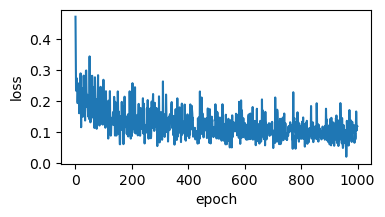

In [275]:
plt.figure(figsize=(4,2))
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [137]:
### 회귀에서 손실함수 저장하기  : 분류와 다른점 -활성함수(출력층)/ 손실함수 관련해서 바꿀것
# 손실함수의 결과값 저장 기능: 손실함수(loss) 계산하기-로지스틱 손실함수
class SingleLayerRegression: # 입력계층 1개, 은닉층 없음
    def __init__(self):
        self.w = None   # 입력된 값 없으므로
        self.b = None
        # 손실 함수 저장하기 위한 리스트
        self.losses = []
        
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def activation(self, z):    #### 이걸 바꿔줘야
        a = z
        return a
    
    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1])
        self.b = 0 
        for epoch in range(epochs):
            # 손실 초기화
            loss = 0
            # x의 index 랜덤하게 반환
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = -(y[i] - a)  # (y - y_hat)
                w_grad, b_grad = self.backprop(x[i], err)
                self.w -= w_grad
                self.b -= b_grad
                
                # 손실 계산 (SE)  (y - y_hat)^2
                loss += err ** 2

            # 에포크마다 평균 손실을 저장
            loss = loss / len(y) # MSE
            self.losses.append(loss)
            print(f'##### EPOCHS : {epoch + 1} ######')
            print(f'loss : {loss}')
            
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        return z


In [138]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
x = diabetes.data
y = diabetes.target

In [141]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, 
                                                    random_state=0)

In [142]:
reg = SingleLayerRegression()
reg.fit(X_train, y_train)

##### EPOCHS : 1 ######
loss : 7296.9557521144525
##### EPOCHS : 2 ######
loss : 6805.32385865946
##### EPOCHS : 3 ######
loss : 5724.368283165251
##### EPOCHS : 4 ######
loss : 5828.046976002336
##### EPOCHS : 5 ######
loss : 5808.536033538758
##### EPOCHS : 6 ######
loss : 5596.578783527946
##### EPOCHS : 7 ######
loss : 6019.148401285322
##### EPOCHS : 8 ######
loss : 5267.43812803303
##### EPOCHS : 9 ######
loss : 5625.9460251611745
##### EPOCHS : 10 ######
loss : 5192.428569813352
##### EPOCHS : 11 ######
loss : 5971.765935201612
##### EPOCHS : 12 ######
loss : 6227.773891181515
##### EPOCHS : 13 ######
loss : 5802.337729907776
##### EPOCHS : 14 ######
loss : 6115.419942691336
##### EPOCHS : 15 ######
loss : 5450.310368126574
##### EPOCHS : 16 ######
loss : 6210.4383291713075
##### EPOCHS : 17 ######
loss : 5665.497604774016
##### EPOCHS : 18 ######
loss : 5736.444620409346
##### EPOCHS : 19 ######
loss : 5493.196502496241
##### EPOCHS : 20 ######
loss : 5328.963368068285
##### EP

In [143]:
pred = reg.predict(X_test)

In [146]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, pred))

88.18849518886623

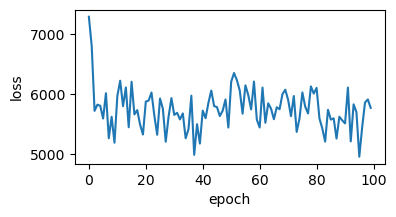

In [147]:
plt.figure(figsize=(4,2))
plt.plot(reg.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
1 에포크는 모든 데이터를 최소 한번은 학습할때 써야지 된다.

에포크마다 학습횟수
    데이터당 학습 - 데이터를 하나씩 적용하여 가중치 업데이트
    1회 학습 - 모든 데이터를 한번에 적용하여 가중치 업데이트
    N회 학습 - 데이터를 M개씩 묶어서 가중치 업데이트

In [208]:
# w - 입력의 데이터 개수(컬럼(독립변수) 개수)
w = np.ones(X_train.shape[1])
b = 0

In [175]:
# 가중합산
z = np.dot(X_train, w.reshape(-1,1)) + b
z

array([[ 919.031974 ],
       [1105.315773 ],
       [2062.382106 ],
       [1199.894821 ],
       [1363.461696 ],
       [1425.711732 ],
       [1221.892839 ],
       [1320.643221 ],
       [1703.59758  ],
       [1099.089946 ],
       [3419.769635 ],
       [1205.121447 ],
       [1833.720622 ],
       [1065.272038 ],
       [ 885.86662  ],
       [1009.445647 ],
       [2880.081853 ],
       [ 983.767752 ],
       [1432.645864 ],
       [1454.523933 ],
       [1116.899418 ],
       [1091.64896  ],
       [1818.728051 ],
       [2004.040203 ],
       [5257.019691 ],
       [ 940.217242 ],
       [1268.874428 ],
       [1433.289843 ],
       [3949.018875 ],
       [1196.484337 ],
       [1066.116326 ],
       [3497.889567 ],
       [1595.946325 ],
       [2285.943564 ],
       [1264.888739 ],
       [1569.27802  ],
       [1305.754048 ],
       [1654.070248 ],
       [ 783.817768 ],
       [1553.187879 ],
       [ 834.482443 ],
       [1936.371057 ],
       [1657.542592 ],
       [173

In [176]:
# 활성함수
z = np.clip(z, -100, None)
a = 1 / (1 + np.exp(-z))
a

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [188]:
# 손실함수 평균값
a2 = np.clip(a, 1e-10, 1-1e-10)
L = (-(y_train.reshape(-1,1) * np.log(a2) + (1 - y_train.reshape(-1,1)) * np.log(1 - a2)))
L.mean()

8.350033823773659

In [209]:
# 오차
err = y_train.reshape(-1,1) - a
# 오차역전파
w = w + np.dot(err.T, X_train).reshape(-1) / X_train.shape[0]
b = b + np.mean(err).reshape(-1)

In [210]:
w

array([  -5.34747253,   -6.76301099,  -40.896     , -356.41912088,
          0.96264721,    0.94768664,    0.94245653,    0.96796378,
          0.93003077,    0.97735699,    0.77717099,    0.56584088,
         -0.56395824,  -25.88364835,    0.99758569,    0.98859683,
          0.98554895,    0.9946943 ,    0.99261347,    0.99857711,
         -6.70386813,   -9.58571429,  -50.43276923, -522.49472527,
          0.94739716,    0.86465132,    0.84012224,    0.93360741,
          0.88205099,    0.96700624])

In [211]:
b

array([-0.36263736])

In [206]:
err.shape

(455, 1)

In [212]:
20.5099 / 455

0.04507670329670329

In [241]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [254]:
class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []
        
    def forpass(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    def backprop(self, x, err):
        m = len(x)
        w_grad = np.dot(x.T, err) / m
        b_grad = np.sum(err) / m  # np.mean(err)
        return w_grad, b_grad
    
    def activation(self, z):
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a

    def predict(self, x):
        z = self.forpass(x)
        return z > 0
    def score(self, x, y):
        return np.mean(self.predict(x) == y.reshape(-1, 1))
    
    def fit(self, x, y, epochs = 100, random_state = None):
        y = y.reshape(-1,1) # 열 벡터로 변환
        m = len(x)
        self.w = np.ones((x.shape[1], 1)) # 가중치 초기화
        self.b = 0 # 절편 초기화
        for i in range(epochs):
            z = self.forpass(x)
            a = self.activation(z)
            err = -(y - a)
            w_grad, b_grad = self.backprop(x, err)
            self.w -= w_grad
            self.b -= b_grad
            a = np.clip(a, 1e-10, 1-1e-10)
            loss = np.mean(-(y*np.log(a) + (1-y)*np.log(1-a))) 
            self.losses.append(loss)

In [255]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# 스케일링
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [256]:
single_layer = SingleLayer()
single_layer.fit(X_train_scaled, y_train, epochs=1000)
single_layer.score(X_test_scaled, y_test)

0.9649122807017544

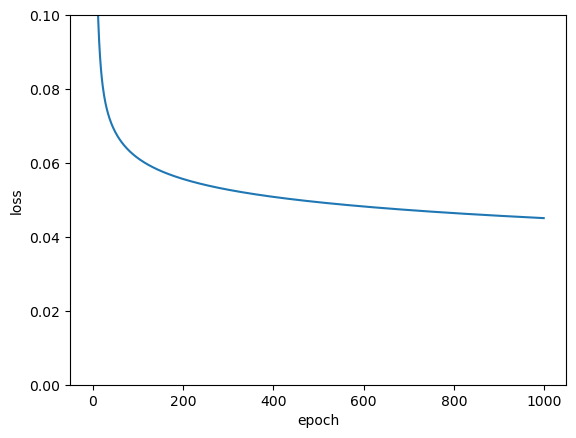

0.04507691979522435


In [263]:
plt.plot(single_layer.losses)
plt.ylim(0,0.1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
print(single_layer.losses[-1])

In [271]:
-(1*np.log(0.95) + (1-1)*np.log(1-0.8))

0.05129329438755058

In [276]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
x = diabetes.data
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, 
                                                    random_state=0)

In [279]:
# 회귀
class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []
        
    def forpass(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    def backprop(self, x, err):
        m = len(x)
        w_grad = np.dot(x.T, err) / m
        b_grad = np.sum(err) / m  # np.mean(err)
        return w_grad, b_grad
    
    def activation(self, z):
        a = z
        return a

    def predict(self, x):
        z = self.forpass(x)
        return z > 0
    def score(self, x, y):
        return np.mean(self.predict(x) == y.reshape(-1, 1))
    
    def fit(self, x, y, epochs = 100, random_state = None):
        y = y.reshape(-1,1) # 열 벡터로 변환
        m = len(x)
        self.w = np.ones((x.shape[1], 1)) # 가중치 초기화
        self.b = 0 # 절편 초기화
        for i in range(epochs):
            z = self.forpass(x)
            a = self.activation(z)
            err = -(y - a)
            w_grad, b_grad = self.backprop(x, err)
            self.w -= w_grad
            self.b -= b_grad
            loss = np.mean(err ** 2)
            self.losses.append(loss)

In [285]:
layer = SingleLayer()
layer.fit(X_train, y_train, epochs=1000)
layer.losses

[29095.16677390798,
 6067.348046408005,
 6024.158804058639,
 5981.698236719412,
 5939.952930405464,
 5898.909725005721,
 5858.555708600888,
 5818.878212751153,
 5779.864807873519,
 5741.503298707074,
 5703.781719864519,
 5666.688331468308,
 5630.211614869793,
 5594.340268449802,
 5559.063203499081,
 5524.369540177109,
 5490.248603547754,
 5456.689919690362,
 5423.683211884782,
 5391.218396868968,
 5359.285581167754,
 5327.875057491457,
 5296.9773012029655,
 5266.582966852034,
 5236.682884775468,
 5207.268057761992,
 5178.32965778053,
 5149.8590227707045,
 5121.847653494383,
 5094.2872104470935,
 5067.169510828171,
 5040.486525568532,
 5014.23037641496,
 4988.39333306984,
 4962.96781038529,
 4937.946365610637,
 4913.321695692235,
 4889.086634624638,
 4865.234150852126,
 4841.7573447196455,
 4818.649445972215,
 4795.903811301887,
 4773.513921941334,
 4751.473381303201,
 4729.775912664332,
 4708.415356894038,
 4687.385670225539,
 4666.680922069786,
 4646.295292870846,
 4626.223072002051,


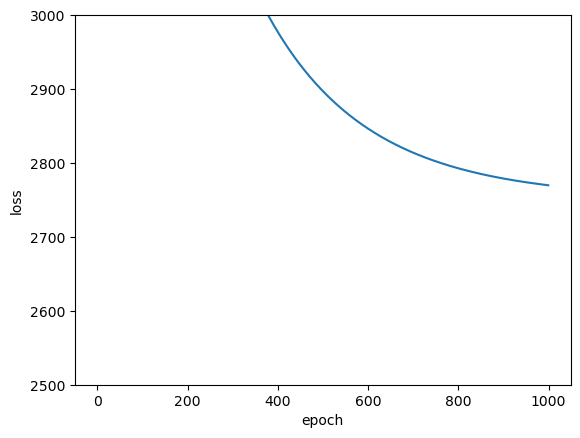

2769.847652804038


In [288]:
plt.plot(layer.losses)
plt.ylim(2500,3000)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
print(layer.losses[-1])